In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Dataset01/Fraud.csv'
data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [5]:
# Basic Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [6]:
# Summary Statistics
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

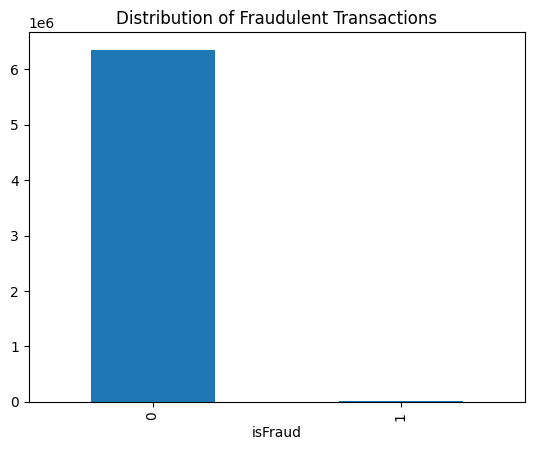

In [7]:
# Distribution of Target Variable
data['isFraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent Transactions')
plt.show()

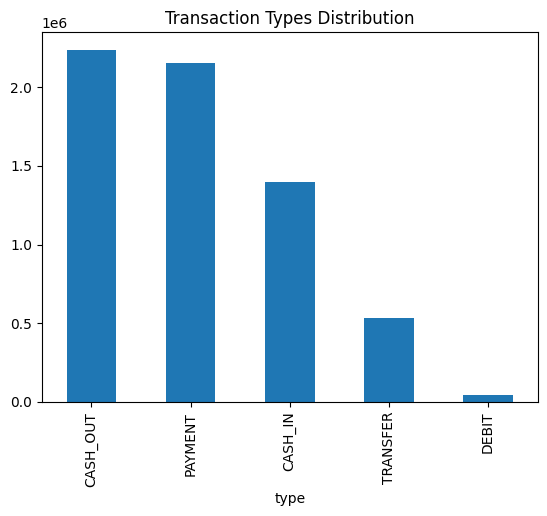

In [9]:
# Transaction Types
data['type'].value_counts().plot(kind='bar')
plt.title('Transaction Types Distribution')
plt.show()

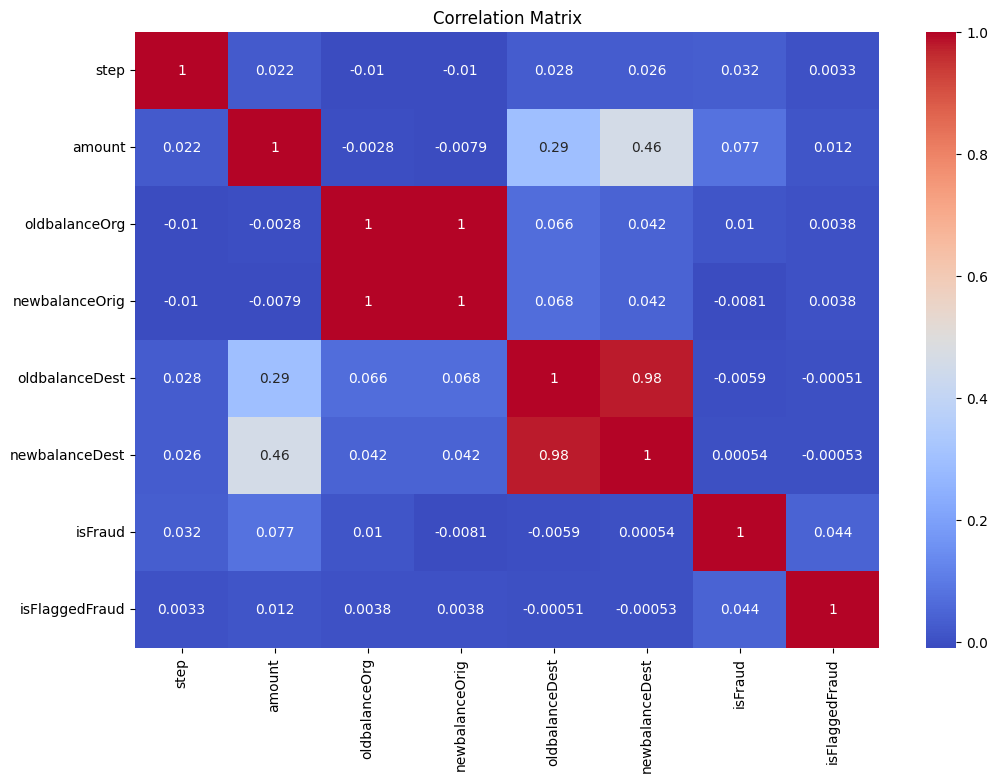

In [11]:
# Handle non-numerical columns before calculating correlations
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

#Correlation Matrix for numerical columns
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

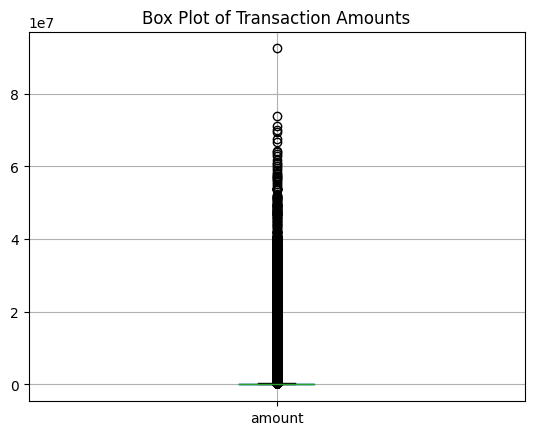

In [12]:
# Box Plot for Amounts
data.boxplot(column=['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()

In [13]:
# Preprocess the data
# Encode categorical variables
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [14]:
# Normalize numerical features
scaler = StandardScaler()
data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
)

In [16]:
# Handle missing values
data.fillna(0, inplace=True)

In [17]:
# Feature Engineering
data['errorOrig'] = data['newbalanceOrig'] - (data['oldbalanceOrg'] - data['amount'])
data['errorDest'] = data['newbalanceDest'] - (data['oldbalanceDest'] + data['amount'])


In [18]:
# Split the data into training and testing sets
X = data.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [19]:
# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.91      0.44      0.59      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.72      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906241     110]
 [   1360    1075]]
Accuracy: 0.9992298770003551


In [21]:
# Feature Importances (for logistic regression, use coefficients)
importances = np.abs(clf.coef_[0])
indices = np.argsort(importances)[::-1]
feature_names = X.columns

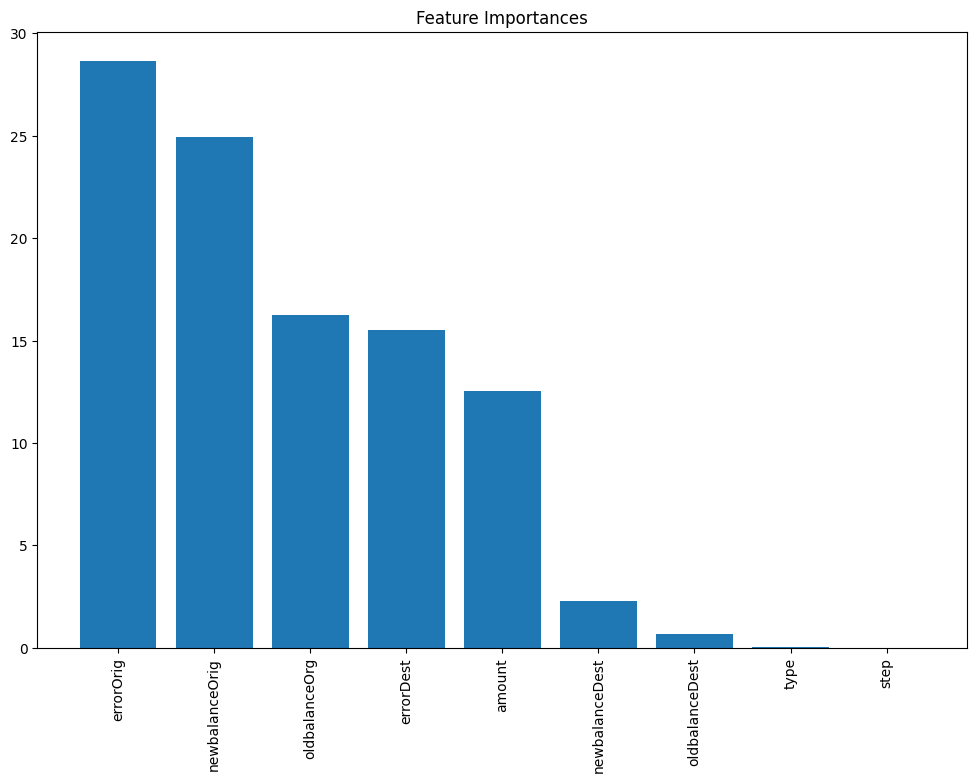

In [22]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()

In [23]:
# Function to make predictions
def predict_fraud(transaction):
    # Convert the transaction dictionary to a DataFrame
    transaction_df = pd.DataFrame([transaction])
    print("Initial DataFrame:\n", transaction_df)

    # Encode the 'type' column using the pre-fitted LabelEncoder
    transaction_df['type'] = le.transform(transaction_df['type'])
    print("DataFrame after encoding 'type':\n", transaction_df)

    # Normalize the numerical features using the pre-fitted StandardScaler
    transaction_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(
        transaction_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
    )
    print("DataFrame after scaling numerical features:\n", transaction_df)

    # Feature engineering to create new features
    transaction_df['errorOrig'] = transaction_df['newbalanceOrig'] - (transaction_df['oldbalanceOrg'] - transaction_df['amount'])
    transaction_df['errorDest'] = transaction_df['newbalanceDest'] - (transaction_df['oldbalanceDest'] + transaction_df['amount'])
    print("DataFrame after feature engineering:\n", transaction_df)

    # Drop unnecessary columns
    transaction_df = transaction_df.drop(['nameOrig', 'nameDest'], axis=1)
    print("DataFrame after dropping columns:\n", transaction_df)

    # Make the prediction using the trained classifier
    prediction = clf.predict(transaction_df)
    print("Prediction array:\n", prediction)
    # Return the single prediction (0 for non-fraudulent, 1 for fraudulent)
    return prediction[0]

In [25]:
# Example prediction
transaction = {
    'step': 1,
    'type': 'TRANSFER',
    'amount': 10000,
    'nameOrig': 'C123456789',
    'oldbalanceOrg': 20000,
    'newbalanceOrig': 10000,
    'nameDest': 'C987654321',
    'oldbalanceDest': 5000,
    'newbalanceDest': 15000,
}

print('Fraud Prediction:', predict_fraud(transaction))

Initial DataFrame:
    step      type  amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER   10000  C123456789          20000           10000   

     nameDest  oldbalanceDest  newbalanceDest  
0  C987654321            5000           15000  
DataFrame after encoding 'type':
    step  type  amount    nameOrig  oldbalanceOrg  newbalanceOrig    nameDest  \
0     1     4   10000  C123456789          20000           10000  C987654321   

   oldbalanceDest  newbalanceDest  
0            5000           15000  
DataFrame after scaling numerical features:
    step  type    amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     4 -0.281294  C123456789      -0.281792       -0.289022   

     nameDest  oldbalanceDest  newbalanceDest  
0  C987654321       -0.322343       -0.329329  
DataFrame after feature engineering:
    step  type    amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     4 -0.281294  C123456789      -0.281792       -0.289022   

     nameDe